In [12]:
samples = [
    'humaneval/gpt-4o_azure_temp_0.8-sanitized/eval_results.json',
    "humaneval/code-llama-7b_temp_0.8/eval_results.json",
    "humaneval/code-llama-13b_temp_0.8/eval_results.json",
    "humaneval/meta-llama--Meta-Llama-3.1-8B-Instruct_openai_temp_0.8-sanitized/eval_results.json",
    "humaneval/meta-llama--Meta-Llama-3.1-70B-Instruct_openai_temp_0.8-sanitized/eval_results.json",
    "humaneval/microsoft--Phi-3-mini-128k-instruct_openai_temp_0.8-sanitized/eval_results.json",
    "humaneval/microsoft--Phi-3-medium-128k-instruct_openai_temp_0.8-sanitized/eval_results.json"
]

In [21]:
import json

data = {}

for res_file in samples:
    print(res_file)
    with open(res_file, "r") as f:
        results = json.load(f)
        data[res_file.replace('/eval_results.json', '').replace('humaneval/', '')] = results

humaneval/gpt-4o_azure_temp_0.8-sanitized/eval_results.json
humaneval/code-llama-7b_temp_0.8/eval_results.json
humaneval/code-llama-13b_temp_0.8/eval_results.json
humaneval/meta-llama--Meta-Llama-3.1-8B-Instruct_openai_temp_0.8-sanitized/eval_results.json
humaneval/meta-llama--Meta-Llama-3.1-70B-Instruct_openai_temp_0.8-sanitized/eval_results.json
humaneval/microsoft--Phi-3-mini-128k-instruct_openai_temp_0.8-sanitized/eval_results.json
humaneval/microsoft--Phi-3-medium-128k-instruct_openai_temp_0.8-sanitized/eval_results.json


In [22]:
fn = ['HumanEval/141',
 'HumanEval/20',
 'HumanEval/107',
 'HumanEval/9',
 'HumanEval/116',
 'HumanEval/114',
 'HumanEval/92',
 'HumanEval/6',
 'HumanEval/88',
 'HumanEval/142',
 'HumanEval/126',
 'HumanEval/136',
 'HumanEval/62',
 'HumanEval/83']

# Filter FNs (these ids are the same as in visualizations.ipynb)
for model, results in data.items():
    for key in list(results['eval'].keys()):
        if key in fn:
            del results['eval'][key]

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)
from collections import defaultdict

def run_optimized_simulation(results, model_name, n_simulations=10000, max_samples=1000):

    sim_results = {model_name: defaultdict(list)}
    
    for task in results['eval']:
        # Convert results to numpy arrays for faster processing
        task_results = results['eval'][task]
        n_solutions = len(task_results)
        
        # Pre-compute status arrays
        base_status = np.array([sol['base_status'] == 'pass' for sol in task_results])
        plus_status = np.array([sol['plus_status'] == 'pass' for sol in task_results])
        
        # Generate all random permutations at once
        indices = np.array([np.random.permutation(n_solutions) for _ in range(n_simulations)])
        
        for sim_idx in range(n_simulations):
            shuffled_base = base_status[indices[sim_idx]]
            shuffled_plus = plus_status[indices[sim_idx]]
            
            # Find first passing solution
            passing_indices = np.where(shuffled_base[:max_samples])[0]
            
            if len(passing_indices) > 0:
                k = passing_indices[0] + 1
                status = 'pass_plus' if shuffled_plus[passing_indices[0]] else 'pass_base'
            else:
                k = max_samples
                status = 'no_solution'
            
            sim_results[model_name][task].append({
                'K': k,
                'status': status,
            })
    
    return sim_results


# FPR Barplots

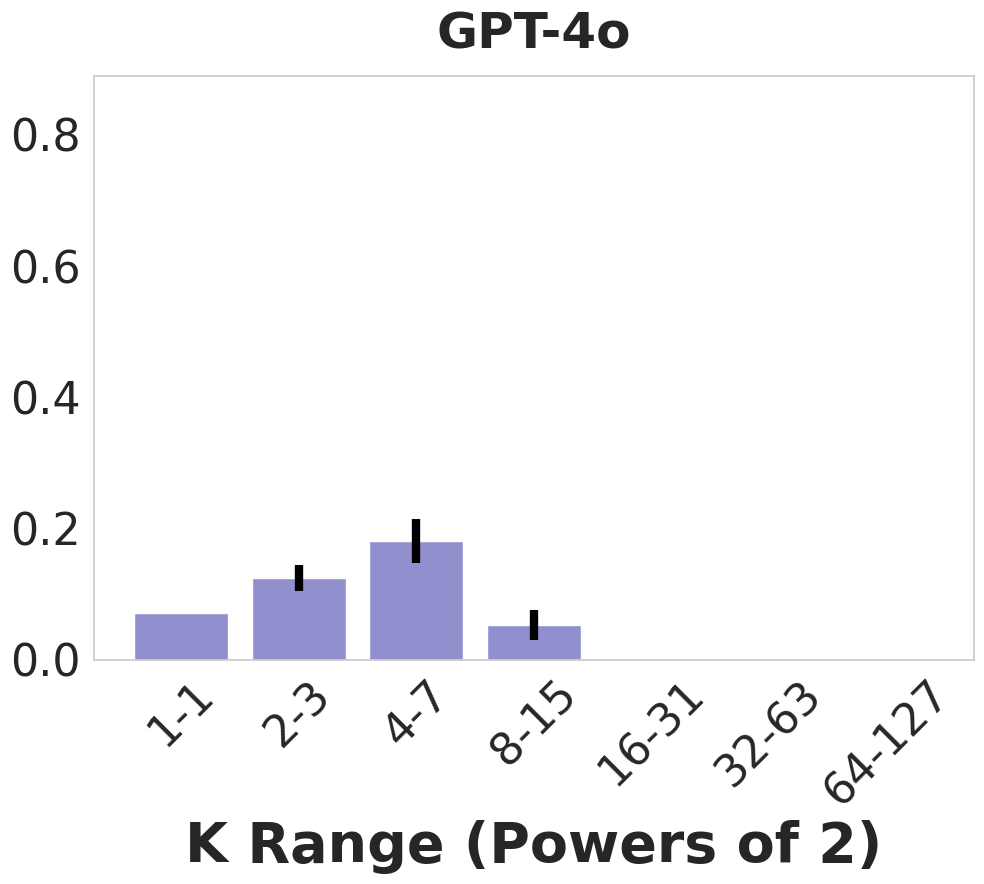

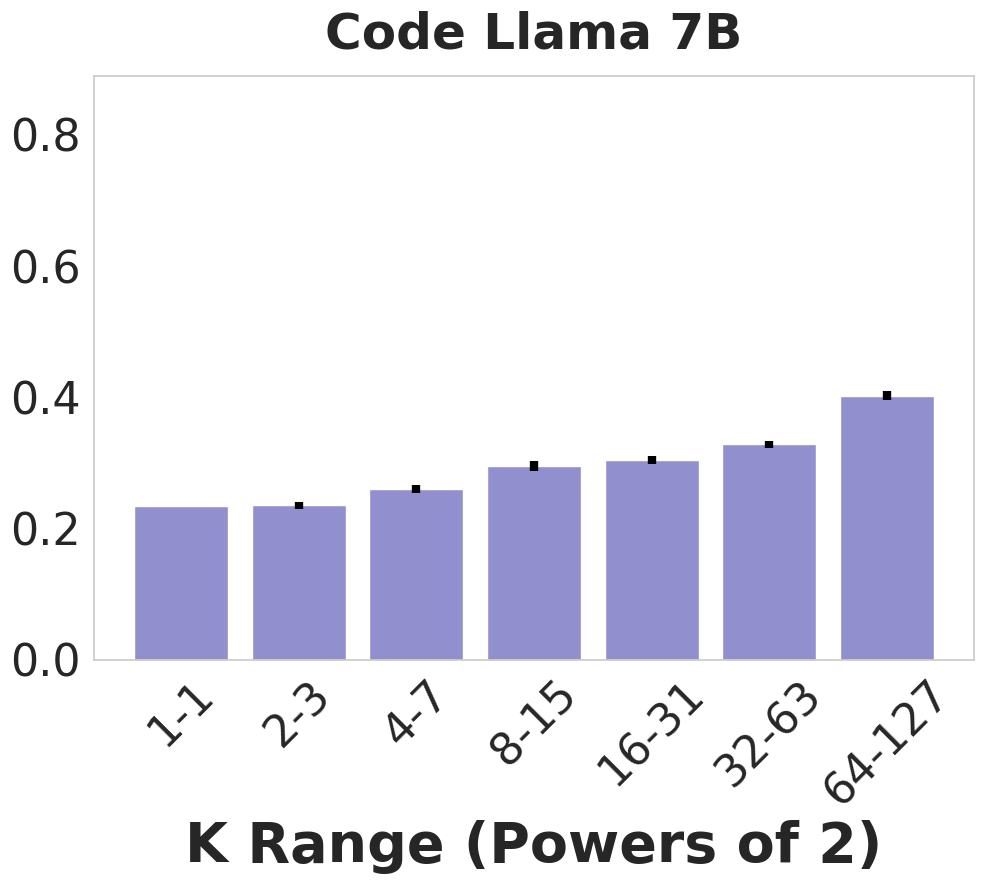

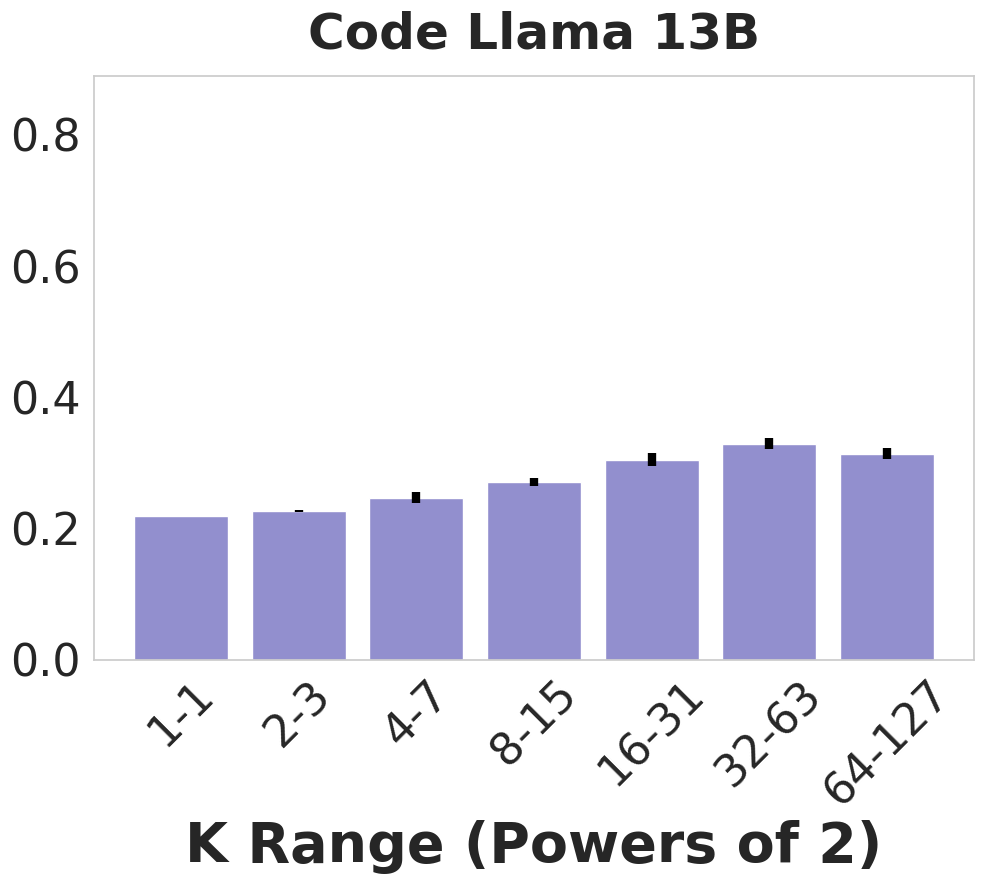

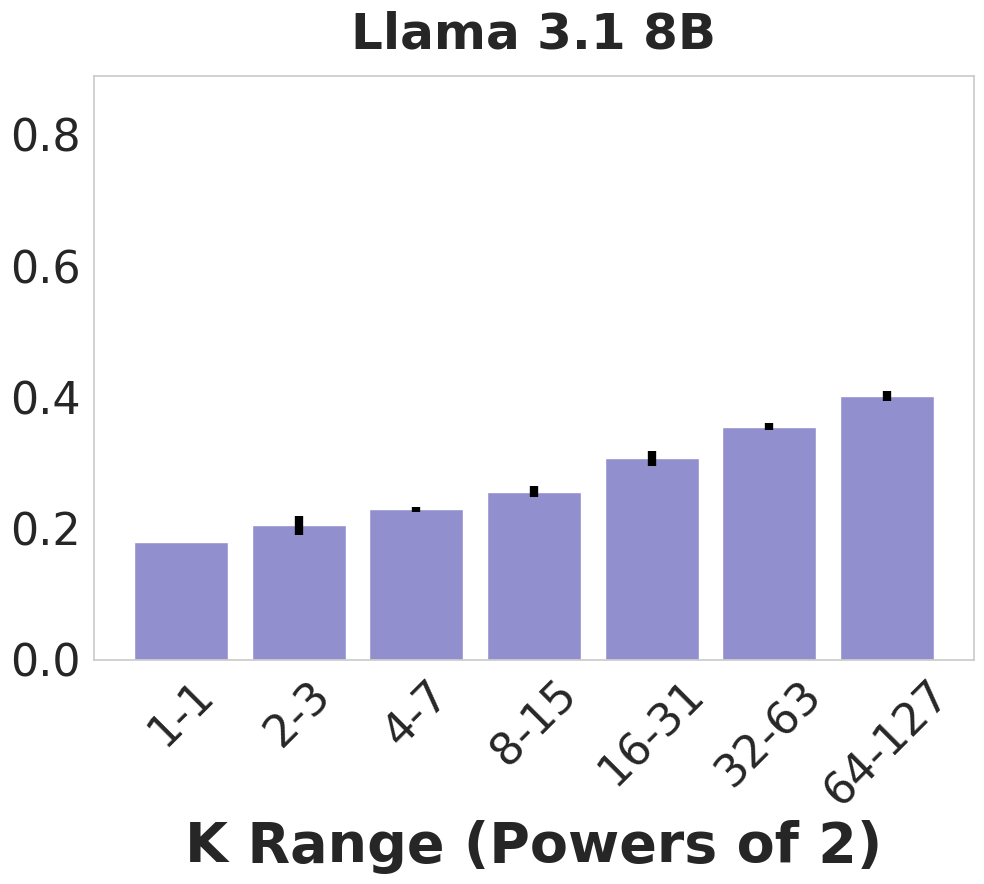

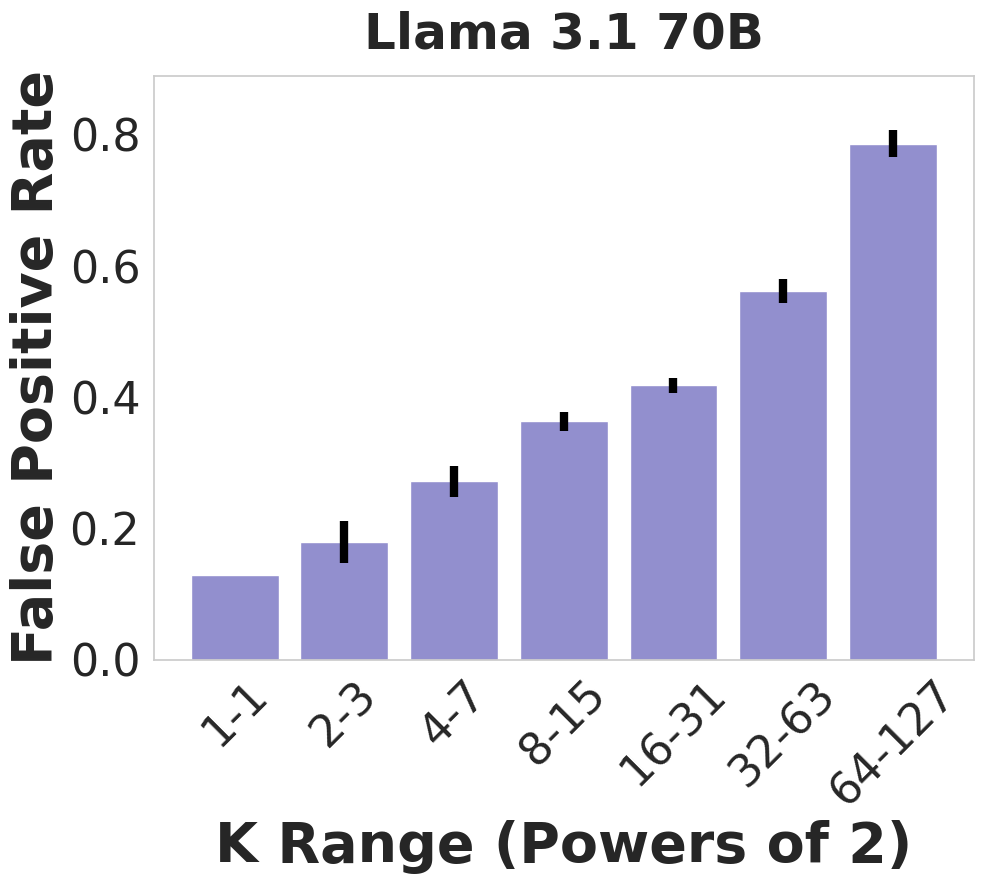

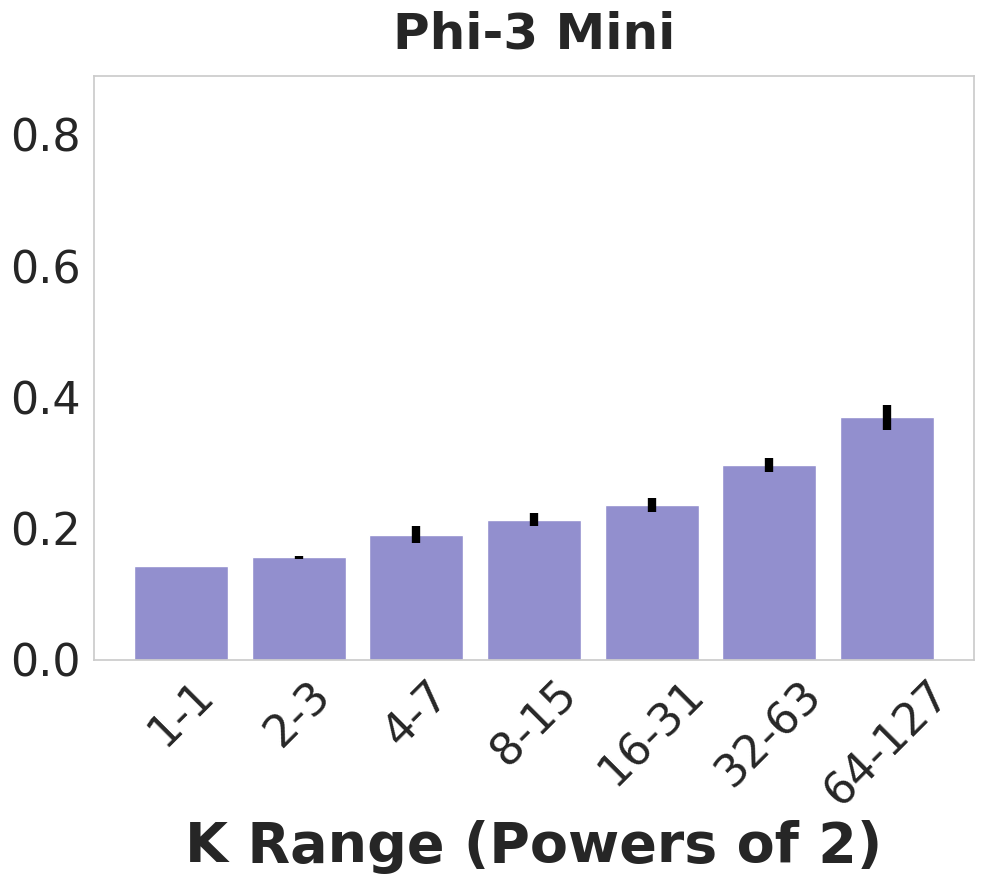

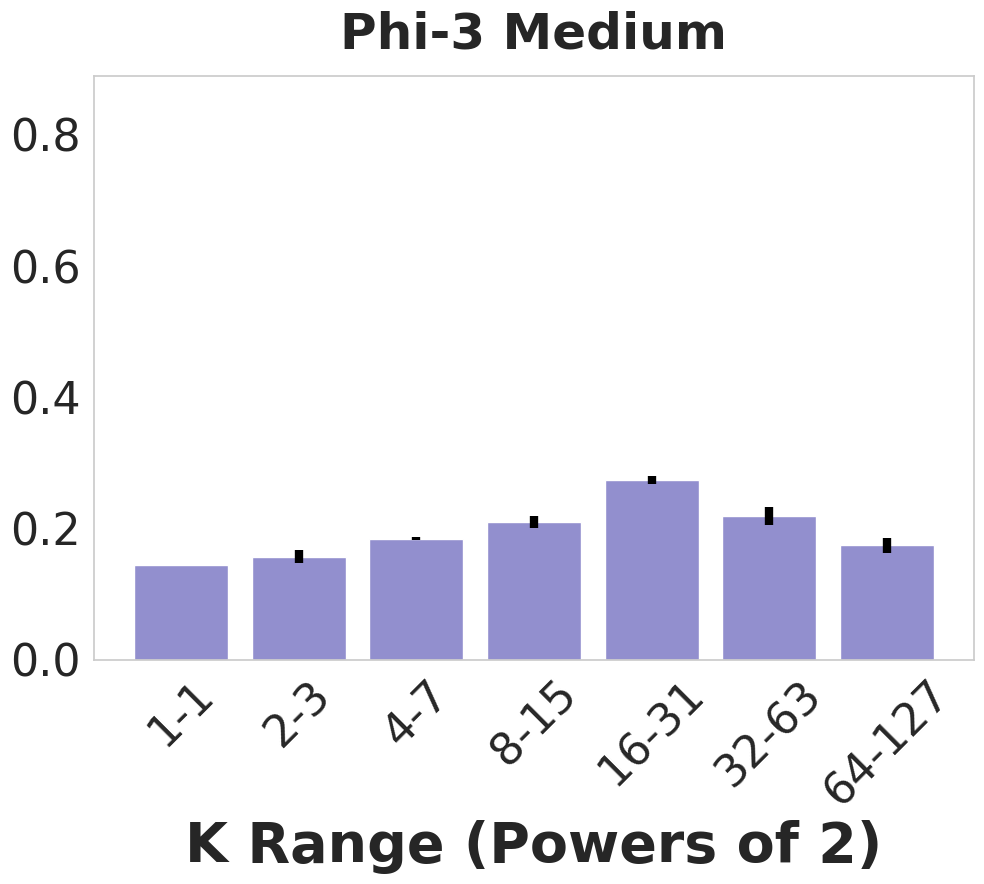

In [24]:
model_name_mapping = {
    'codegen-6b': 'CodeGen',
    'vicuna-7b': 'Vicuna 7B',
    'codegen2-7b': 'CodeGen2',
    'codet5p-16b': 'CodeT5p 16B',
    'code-llama-7b': 'Code Llama 7B',
    'starcoder': 'StarCoder',
    'mistral-7b': 'Mistral 7B',
    'code-llama-13b': 'Code Llama 13B',
    'command-r_cohere': 'Command-R',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'meta-llama--Meta-Llama-3.1-8B-Instruct_openai': 'Llama 3.1 8B',
    'meta-llama--Meta-Llama-3.1-70B-Instruct_openai': 'Llama 3.1 70B',
    'microsoft--Phi-3-mini-128k-instruct_openai': 'Phi-3 Mini',
    'microsoft--Phi-3-medium-128k-instruct_openai': 'Phi-3 Medium',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'gpt-4o_azure': 'GPT-4o'
}

model_titles = {
    'codegen-6b': 'CodeGen 6B',
    'vicuna-7b': 'Vicuna 7B',
    'codegen2-7b': 'CodeGen2 7B',
    'codet5p-16b': 'CodeT5+ 16B',
    'code-llama-7b': 'Code Llama 7B',
    'starcoder': 'StarCoder',
    'mistral-7b': 'Mistral 7B',
    'code-llama-13b': 'Code Llama 13B',
    'command-r_cohere': 'Command-R',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'meta-llama--Meta-Llama-3.1-8B-Instruct_openai': 'Llama 3.1 8B',
    'meta-llama--Meta-Llama-3.1-70B-Instruct_openai': 'Llama 3.1 70B',
    'microsoft--Phi-3-mini-128k-instruct_openai': 'Phi-3 Mini',
    'microsoft--Phi-3-medium-128k-instruct_openai': 'Phi-3 Medium',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'gpt-4o_azure': 'GPT-4o'
}


import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

for model, results in data.items():
    sim_results = run_optimized_simulation(results, model, n_simulations=1000, max_samples=200)

    # Initialize an empty DataFrame
    all_tasks_df = pd.DataFrame()

    # Loop through each task_id and its data
    for task_id, entries in sim_results[model].items():
        task_df = pd.DataFrame(entries)
        task_df['task_id'] = task_id  # Add task_id as a column
        all_tasks_df = pd.concat([all_tasks_df, task_df], ignore_index=True)

    all_tasks_df['false_positive'] = all_tasks_df['status'].apply(lambda x: x == 'pass_base')

    all_tasks_df = all_tasks_df[all_tasks_df['status'] != 'no_solution']

    # compute fpr for each k across tasks
    fpr = all_tasks_df.groupby(['K', 'task_id'])['false_positive'].mean().reset_index()
    fpr = fpr.groupby('K')['false_positive'].mean().reset_index()
    
    # Create bucket labels based on powers of 2
    def get_bucket(k):
        if k == 0:
            return '0-1'
        bucket_index = int(np.floor(np.log2(k)))
        lower = 2**bucket_index
        upper = 2**(bucket_index + 1) - 1
        return f'{lower}-{upper}'

    # Add bucket column
    fpr['bucket'] = fpr['K'].apply(get_bucket)

    # Sort the buckets properly (custom sort because default string sort won't work)
    def bucket_sort_key(range_str):
        return int(range_str.split('-')[0])
    
    # Calculate average FPR and standard error for each bucket
    bucket_stats = fpr.groupby('bucket').agg({
        'false_positive': ['mean', 'std', 'count']
    }).reset_index()
    bucket_stats.columns = ['range', 'avg_fpr', 'std', 'count']

    # Calculate standard error
    bucket_stats['se'] = bucket_stats['std'] / np.sqrt(bucket_stats['count'])

    # Sort the buckets
    bucket_stats['sort_key'] = bucket_stats['range'].apply(bucket_sort_key)
    bucket_stats = bucket_stats.sort_values('sort_key').drop('sort_key', axis=1)

    # Drop the last bucket
    bucket_stats = bucket_stats[bucket_stats['range'] != '128-255']

    # Create the visualization with error bars
    plt.figure(figsize=(10, 9))
    sns.barplot(
        data=bucket_stats, 
        x='range', 
        y='avg_fpr', 
        color='#8884d8',
    )
    
    # Add error bars manually with increased width
    plt.errorbar(
        x=range(len(bucket_stats)),
        y=bucket_stats['avg_fpr'],
        yerr=bucket_stats['se'],
        fmt='none',  # Don't add any markers
        color='black',
        capsize=0,  # Increase this to make caps wider
        capthick=1.5,  # Increase this to make caps thicker
        elinewidth=6  # Increase this to make error bars thicker
    )
    
    model_title = model_titles[model.replace("humaneval/", "").replace("/eval_results.json", "").replace("_temp_0.8", "").replace("-sanitized", "")]

    # Rest of the plotting code remains the same
    plt.title(f"{model_title}", fontsize=36, weight='bold', pad=20)
    plt.xlabel('K Range (Powers of 2)', fontsize=40, weight='bold')
    if model_title == 'Llama 3.1 70B':
        plt.ylabel('False Positive Rate', fontsize=40, weight='bold')
    else:
        plt.ylabel('', fontsize=32, weight='bold')
    plt.xticks(rotation=45, fontsize=32)
    plt.yticks(fontsize=32)
    plt.ylim(0, 0.89)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8])
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(f"figs/fpr_{model_title.lower()}.png")
    plt.show()    

# Scaling curves

## Llama 3.1 70B

For pass_base=0: Maximum reward of 0.834 achieved at K = 149
For pass_base=-1: Maximum reward of 0.716 achieved at K = 24
For pass_base=-2: Maximum reward of 0.608 achieved at K = 8
For pass_base=-4: Maximum reward of 0.433 achieved at K = 2
For pass_base=-8: Maximum reward of 0.140 achieved at K = 1


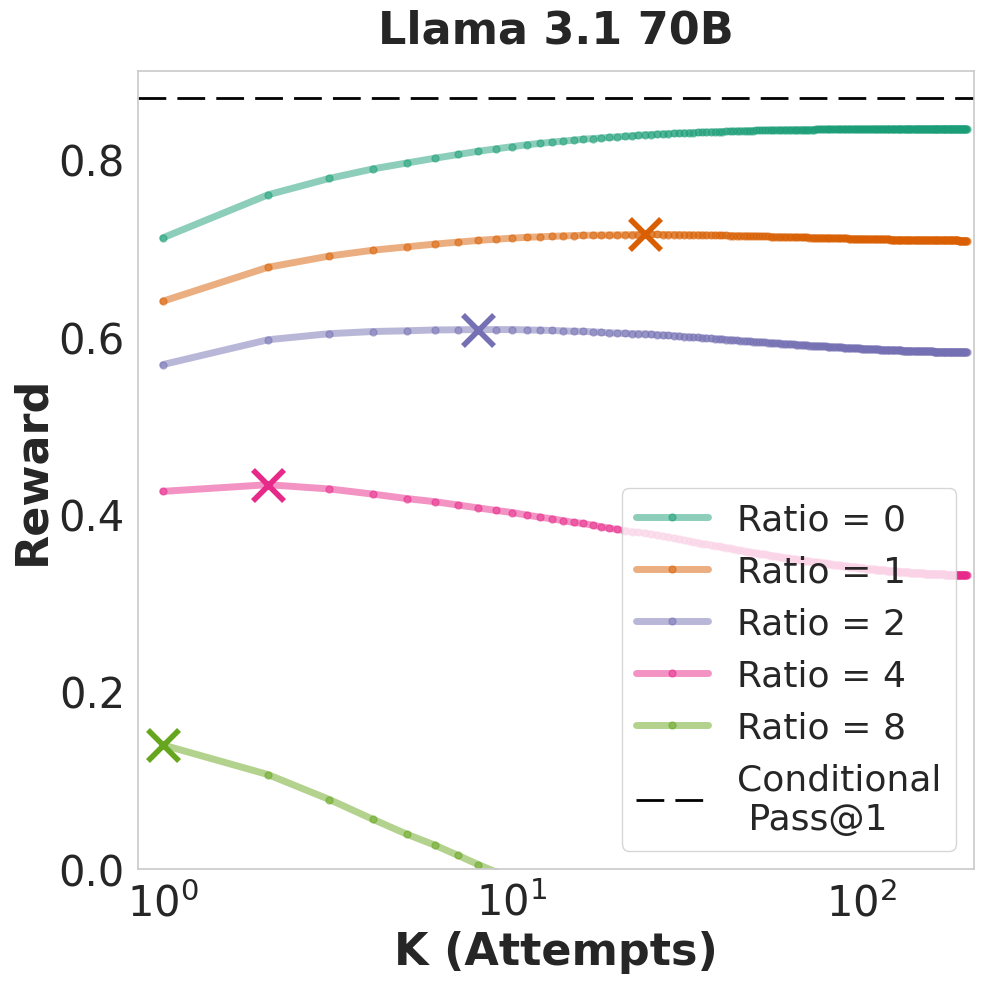

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Define different pass_base rewards to try
pass_base_rewards = [0, -1, -2, -4, -8]  # You can modify these values
K_MAX = 200

MODEL = "meta-llama--Meta-Llama-3.1-70B-Instruct_openai_temp_0.8-sanitized"
sim_results = run_optimized_simulation(data[MODEL], MODEL, n_simulations=1000, max_samples=200)

# Initialize an empty DataFrame
all_tasks_df = pd.DataFrame()

# Loop through each task_id and its data
for task_id, entries in sim_results[MODEL].items():
    task_df = pd.DataFrame(entries)
    task_df['task_id'] = task_id  # Add task_id as a column
    all_tasks_df = pd.concat([all_tasks_df, task_df], ignore_index=True)

plt.figure(figsize=(10, 10))
sns.set(style="whitegrid", palette="Dark2")

# Create a different color for each pass_base reward
colors = sns.color_palette("Dark2", n_colors=len(pass_base_rewards))
optimal_k_values = []

for pass_base, color in zip(pass_base_rewards, colors):
    # Create reward map for this pass_base value
    reward_map = {
        'pass_plus': 1,
        'pass_base': pass_base,
        'no_solution': 0
    }
    
    # Map the status to rewards
    all_tasks_df['reward'] = all_tasks_df['status'].map(reward_map)
    
    # Create reward_k columns
    for k in range(1, K_MAX + 1):
        all_tasks_df[f'reward_{k}'] = np.where(all_tasks_df['K'] <= k, all_tasks_df['reward'], 0)
    
    # Calculate average reward for each task at each K level
    task_reward_summary = all_tasks_df.groupby('task_id').agg(
        **{f'avg_reward_{k}': (f'reward_{k}', 'mean') for k in range(1, K_MAX + 1)}
    ).reset_index()
    
    # Compute mean rewards for each K value across tasks
    reward_summary_df = pd.DataFrame({
        'K': range(1, K_MAX + 1),
        'mean_reward': [task_reward_summary[f'avg_reward_{k}'].mean() for k in range(1, K_MAX + 1)]
    })
    
    # Plot this line
    plt.plot(reward_summary_df['K'], reward_summary_df['mean_reward'], 
             marker='o', markersize=5, color=color, 
             label=f'Ratio = {abs(pass_base)}', linewidth=5, alpha=0.5)
    
    # Find and mark optimal K for this pass_base
    max_reward = reward_summary_df['mean_reward'].max()
    max_reward_k = reward_summary_df['K'][reward_summary_df['mean_reward'].idxmax()]
    if max_reward < 0:
        max_reward_k = 0
        
    if max_reward_k != K_MAX and pass_base != 0:    
        # Add vertical line at optimal K
        # plt.axvline(x=max_reward_k, color=color, linestyle='--', alpha=0.5, linewidth=3, dashes=(10, 4))
        # Store optimal K for labeling
        optimal_k_values.append((max_reward_k, color, pass_base))
        
        # add X marker
        plt.scatter(max_reward_k, max_reward, color=color, s=500, marker='x', linewidth=4)

    
    print(f'For pass_base={pass_base}: Maximum reward of {max_reward:.3f} achieved at K = {max_reward_k}')
    
    
plt.axhline(y=0.8695344754631117, color='black', linestyle='--', dashes=(10,4), linewidth=2, label='Conditional\n Pass@1')
plt.grid(False)
plt.xlabel('K (Attempts)', fontsize=32, fontweight='bold')
plt.ylabel('Reward', fontsize=32, fontweight='bold')
plt.title('Llama 3.1 70B', fontsize=32, fontweight='bold', pad=20)

# set xaxis to log
plt.xscale('log')
plt.xlim(.85, K_MAX+10)
plt.ylim(-0,0.9)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8])

# plt.xticks(fontsize=42)
# plt.yticks(fontsize=42)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# plt.xticks(range(1, K_MAX+1, 2))  # Show every other K value to avoid crowding
plt.legend(loc='lower right', fontsize=26)
plt.tight_layout()
plt.savefig("figs/reward_llama_70b.png")
plt.show()

## Llama 3.1 8B

For pass_base=0: Maximum reward of 0.799 achieved at K = 200
For pass_base=-1: Maximum reward of 0.630 achieved at K = 200
For pass_base=-2: Maximum reward of 0.478 achieved at K = 22
For pass_base=-4: Maximum reward of 0.221 achieved at K = 4
For pass_base=-8: Maximum reward of -0.142 achieved at K = 0


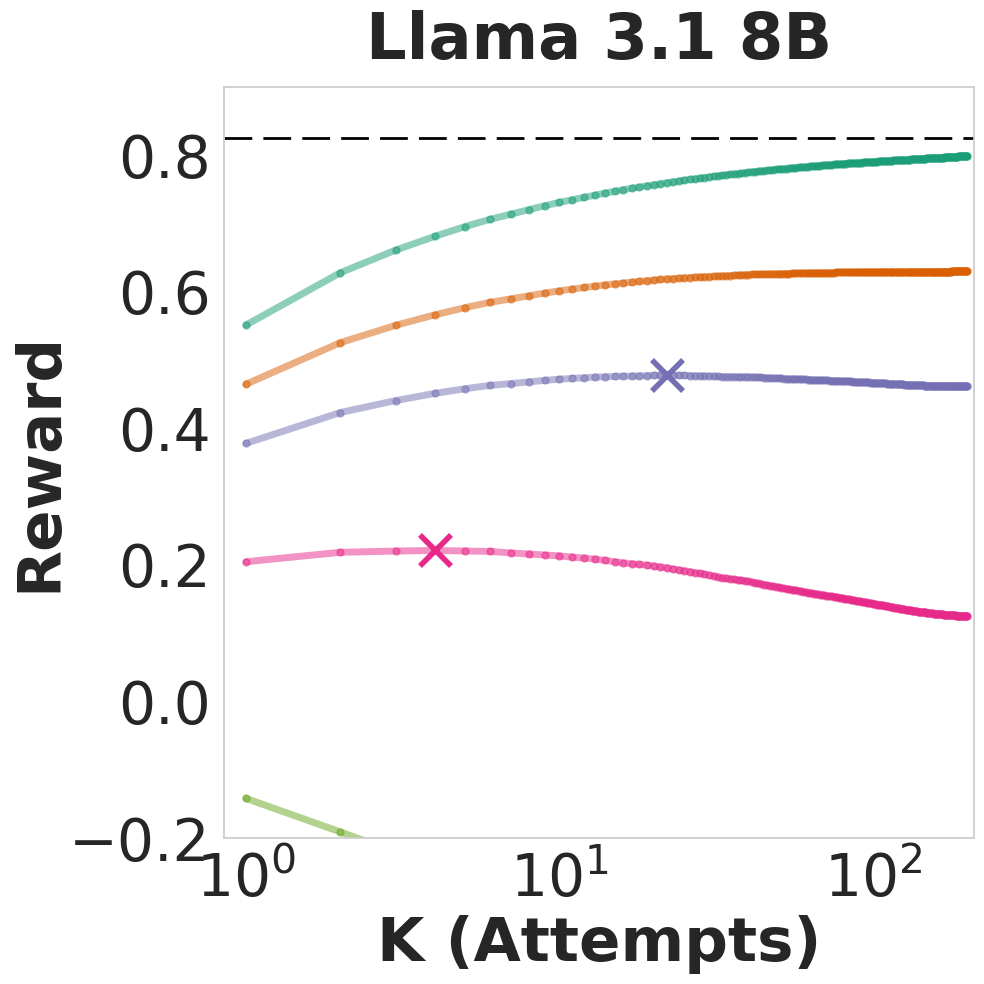

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Define different pass_base rewards to try
pass_base_rewards = [0, -1, -2, -4, -8]  # You can modify these values
K_MAX = 200

MODEL = "meta-llama--Meta-Llama-3.1-8B-Instruct_openai_temp_0.8-sanitized"
sim_results = run_optimized_simulation(data[MODEL], MODEL, n_simulations=1000, max_samples=200)

# Initialize an empty DataFrame
all_tasks_df = pd.DataFrame()

# Loop through each task_id and its data
for task_id, entries in sim_results[MODEL].items():
    task_df = pd.DataFrame(entries)
    task_df['task_id'] = task_id  # Add task_id as a column
    all_tasks_df = pd.concat([all_tasks_df, task_df], ignore_index=True)

plt.figure(figsize=(10, 10))
sns.set(style="whitegrid", palette="Dark2")

# Create a different color for each pass_base reward
colors = sns.color_palette("Dark2", n_colors=len(pass_base_rewards))
optimal_k_values = []

for pass_base, color in zip(pass_base_rewards, colors):
    # Create reward map for this pass_base value
    reward_map = {
        'pass_plus': 1,
        'pass_base': pass_base,
        'no_solution': 0
    }
    
    # Map the status to rewards
    all_tasks_df['reward'] = all_tasks_df['status'].map(reward_map)
    
    # Create reward_k columns
    for k in range(1, K_MAX + 1):
        all_tasks_df[f'reward_{k}'] = np.where(all_tasks_df['K'] <= k, all_tasks_df['reward'], 0)
    
    # Calculate average reward for each task at each K level
    task_reward_summary = all_tasks_df.groupby('task_id').agg(
        **{f'avg_reward_{k}': (f'reward_{k}', 'mean') for k in range(1, K_MAX + 1)}
    ).reset_index()
    
    # Compute mean rewards for each K value across tasks
    reward_summary_df = pd.DataFrame({
        'K': range(1, K_MAX + 1),
        'mean_reward': [task_reward_summary[f'avg_reward_{k}'].mean() for k in range(1, K_MAX + 1)]
    })
    
    # Plot this line
    plt.plot(reward_summary_df['K'], reward_summary_df['mean_reward'], 
             marker='o', markersize=5, color=color, 
             label=f'Penalty-Ratio = {pass_base}', linewidth=5, alpha=0.5)
    
    # Find and mark optimal K for this pass_base
    max_reward = reward_summary_df['mean_reward'].max()
    max_reward_k = reward_summary_df['K'][reward_summary_df['mean_reward'].idxmax()]
    if max_reward < 0:
        max_reward_k = 0
        
    if max_reward_k != K_MAX:    
        # Store optimal K for labeling
        optimal_k_values.append((max_reward_k, color, pass_base))
        
        # add X marker
        plt.scatter(max_reward_k, max_reward, color=color, s=500, marker='x', linewidth=4)

    
    
    print(f'For pass_base={pass_base}: Maximum reward of {max_reward:.3f} achieved at K = {max_reward_k}')
    
    
plt.axhline(y=0.8246222663512303, color='black', linestyle='--', dashes=(10,4), linewidth=2, label='Conditional\n Pass@1')
plt.grid(False)
plt.xlabel('K (Attempts)', fontsize=44, fontweight='bold')
plt.ylabel('Reward', fontsize=44, fontweight='bold', labelpad=0)
plt.title('Llama 3.1 8B', fontsize=46, fontweight='bold', pad=20)

# set xaxis to log
plt.xscale('log')
plt.xlim(.85, K_MAX+10)
plt.ylim(-0.2,0.9)

plt.xticks(fontsize=42)
plt.yticks(fontsize=42)

plt.tight_layout()
plt.savefig("figs/reward_llama_8b.png")
plt.show()

## Phi-3 Mini

For pass_base=0: Maximum reward of 0.828 achieved at K = 196
For pass_base=-1: Maximum reward of 0.692 achieved at K = 126
For pass_base=-2: Maximum reward of 0.558 achieved at K = 85
For pass_base=-4: Maximum reward of 0.302 achieved at K = 4
For pass_base=-8: Maximum reward of -0.050 achieved at K = 0


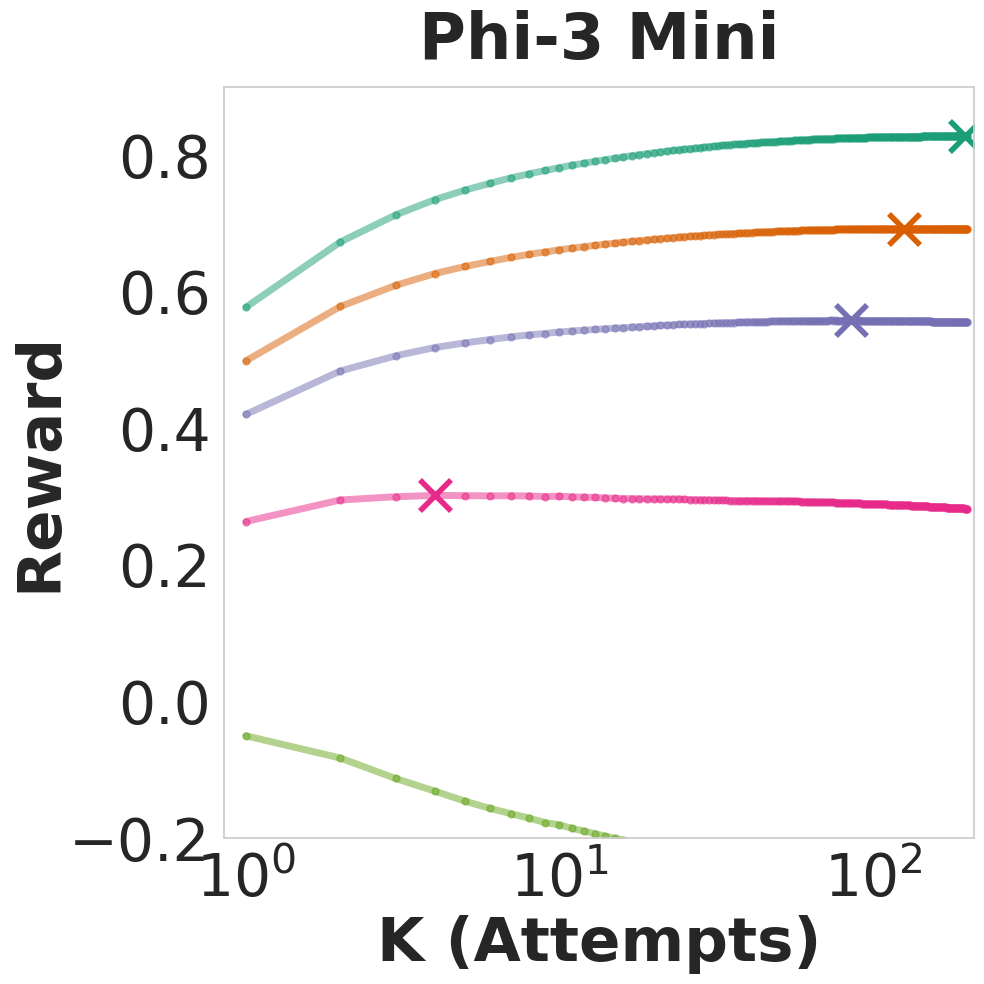

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Define different pass_base rewards to try
pass_base_rewards = [0, -1, -2, -4, -8]  # You can modify these values
K_MAX = 200

MODEL = "microsoft--Phi-3-mini-128k-instruct_openai_temp_0.8-sanitized"
sim_results = run_optimized_simulation(data[MODEL], MODEL, n_simulations=1000, max_samples=200)

# Initialize an empty DataFrame
all_tasks_df = pd.DataFrame()

# Loop through each task_id and its data
for task_id, entries in sim_results[MODEL].items():
    task_df = pd.DataFrame(entries)
    task_df['task_id'] = task_id  # Add task_id as a column
    all_tasks_df = pd.concat([all_tasks_df, task_df], ignore_index=True)

plt.figure(figsize=(10, 10))
sns.set(style="whitegrid", palette="Dark2")

# Create a different color for each pass_base reward
colors = sns.color_palette("Dark2", n_colors=len(pass_base_rewards))
optimal_k_values = []

for pass_base, color in zip(pass_base_rewards, colors):
    # Create reward map for this pass_base value
    reward_map = {
        'pass_plus': 1,
        'pass_base': pass_base,
        'no_solution': 0
    }
    
    # Map the status to rewards
    all_tasks_df['reward'] = all_tasks_df['status'].map(reward_map)
    
    # Create reward_k columns
    for k in range(1, K_MAX + 1):
        all_tasks_df[f'reward_{k}'] = np.where(all_tasks_df['K'] <= k, all_tasks_df['reward'], 0)
    
    # Calculate average reward for each task at each K level
    task_reward_summary = all_tasks_df.groupby('task_id').agg(
        **{f'avg_reward_{k}': (f'reward_{k}', 'mean') for k in range(1, K_MAX + 1)}
    ).reset_index()
    
    # Compute mean rewards for each K value across tasks
    reward_summary_df = pd.DataFrame({
        'K': range(1, K_MAX + 1),
        'mean_reward': [task_reward_summary[f'avg_reward_{k}'].mean() for k in range(1, K_MAX + 1)]
    })
    
    # Plot this line
    plt.plot(reward_summary_df['K'], reward_summary_df['mean_reward'], 
             marker='o', markersize=5, color=color, 
             label=f'Penalty-Ratio = {pass_base}', linewidth=5, alpha=0.5)
    
    # Find and mark optimal K for this pass_base
    max_reward = reward_summary_df['mean_reward'].max()
    max_reward_k = reward_summary_df['K'][reward_summary_df['mean_reward'].idxmax()]
    if max_reward < 0:
        max_reward_k = 0
        
    if max_reward_k != K_MAX:    
        # Store optimal K for labeling
        optimal_k_values.append((max_reward_k, color, pass_base))

        # add X marker
        plt.scatter(max_reward_k, max_reward, color=color, s=500, marker='x', linewidth=4)

    
    
    print(f'For pass_base={pass_base}: Maximum reward of {max_reward:.3f} achieved at K = {max_reward_k}')
    
    

plt.grid(False)
plt.xlabel('K (Attempts)', fontsize=44, fontweight='bold')
plt.ylabel('Reward', fontsize=44, fontweight='bold', labelpad=0)
plt.title('Phi-3 Mini', fontsize=46, fontweight='bold', pad=20)

# set xaxis to log
plt.xscale('log')
plt.xlim(.85, K_MAX+10)
plt.ylim(-0.2,0.9)

plt.xticks(fontsize=42)
plt.yticks(fontsize=42)

plt.tight_layout()
plt.show()

## Phi-3 Medium

For pass_base=0: Maximum reward of 0.830 achieved at K = 200
For pass_base=-1: Maximum reward of 0.694 achieved at K = 200
For pass_base=-2: Maximum reward of 0.557 achieved at K = 200
For pass_base=-4: Maximum reward of 0.305 achieved at K = 3
For pass_base=-8: Maximum reward of -0.050 achieved at K = 0


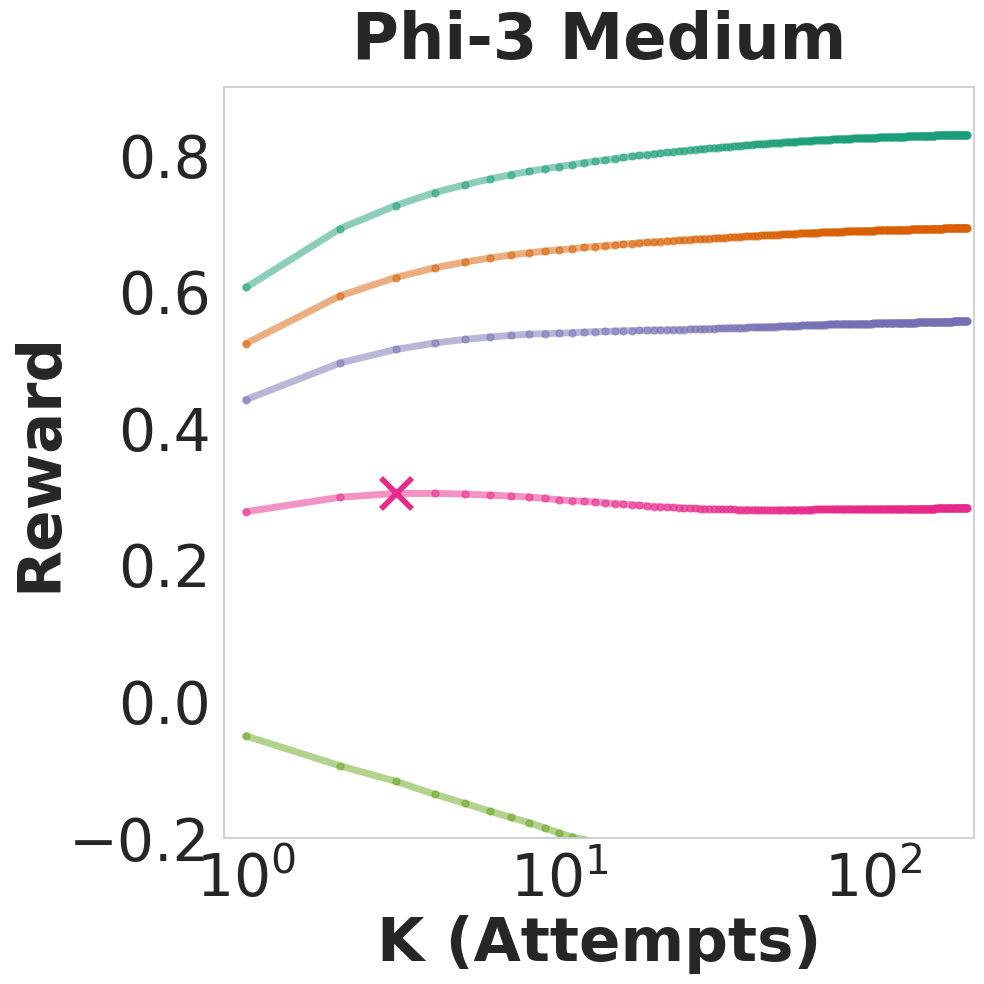

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Define different pass_base rewards to try
pass_base_rewards = [0, -1, -2, -4, -8]  # You can modify these values
K_MAX = 200

MODEL = "microsoft--Phi-3-medium-128k-instruct_openai_temp_0.8-sanitized"
sim_results = run_optimized_simulation(data[MODEL], MODEL, n_simulations=1000, max_samples=200)

# Initialize an empty DataFrame
all_tasks_df = pd.DataFrame()

# Loop through each task_id and its data
for task_id, entries in sim_results[MODEL].items():
    task_df = pd.DataFrame(entries)
    task_df['task_id'] = task_id  # Add task_id as a column
    all_tasks_df = pd.concat([all_tasks_df, task_df], ignore_index=True)

plt.figure(figsize=(10, 10))
sns.set(style="whitegrid", palette="Dark2")

# Create a different color for each pass_base reward
colors = sns.color_palette("Dark2", n_colors=len(pass_base_rewards))
optimal_k_values = []

for pass_base, color in zip(pass_base_rewards, colors):
    # Create reward map for this pass_base value
    reward_map = {
        'pass_plus': 1,
        'pass_base': pass_base,
        'no_solution': 0
    }
    
    # Map the status to rewards
    all_tasks_df['reward'] = all_tasks_df['status'].map(reward_map)
    
    # Create reward_k columns
    for k in range(1, K_MAX + 1):
        all_tasks_df[f'reward_{k}'] = np.where(all_tasks_df['K'] <= k, all_tasks_df['reward'], 0)
    
    # Calculate average reward for each task at each K level
    task_reward_summary = all_tasks_df.groupby('task_id').agg(
        **{f'avg_reward_{k}': (f'reward_{k}', 'mean') for k in range(1, K_MAX + 1)}
    ).reset_index()
    
    # Compute mean rewards for each K value across tasks
    reward_summary_df = pd.DataFrame({
        'K': range(1, K_MAX + 1),
        'mean_reward': [task_reward_summary[f'avg_reward_{k}'].mean() for k in range(1, K_MAX + 1)]
    })
    
    # Plot this line
    plt.plot(reward_summary_df['K'], reward_summary_df['mean_reward'], 
             marker='o', markersize=5, color=color, 
             label=f'Penalty-Ratio = {pass_base}', linewidth=5, alpha=0.5)
    
    # Find and mark optimal K for this pass_base
    max_reward = reward_summary_df['mean_reward'].max()
    max_reward_k = reward_summary_df['K'][reward_summary_df['mean_reward'].idxmax()]
    if max_reward < 0:
        max_reward_k = 0
        
    if max_reward_k != K_MAX:    
        # Store optimal K for labeling
        optimal_k_values.append((max_reward_k, color, pass_base))
        # add X marker
        plt.scatter(max_reward_k, max_reward, color=color, s=500, marker='x', linewidth=4)

    
    
    print(f'For pass_base={pass_base}: Maximum reward of {max_reward:.3f} achieved at K = {max_reward_k}')
    
    

plt.grid(False)
plt.xlabel('K (Attempts)', fontsize=44, fontweight='bold')
plt.ylabel('Reward', fontsize=44, fontweight='bold', labelpad=0)
plt.title('Phi-3 Medium', fontsize=46, fontweight='bold', pad=20)

# set xaxis to log
plt.xscale('log')
plt.xlim(.85, K_MAX+10)
plt.ylim(-0.2,0.9)

plt.xticks(fontsize=42)
plt.yticks(fontsize=42)

plt.tight_layout()
plt.show()

## Code Llama 13B

For pass_base=0: Maximum reward of 0.732 achieved at K = 200
For pass_base=-1: Maximum reward of 0.524 achieved at K = 197
For pass_base=-2: Maximum reward of 0.320 achieved at K = 98
For pass_base=-4: Maximum reward of 0.083 achieved at K = 1
For pass_base=-8: Maximum reward of -0.173 achieved at K = 0


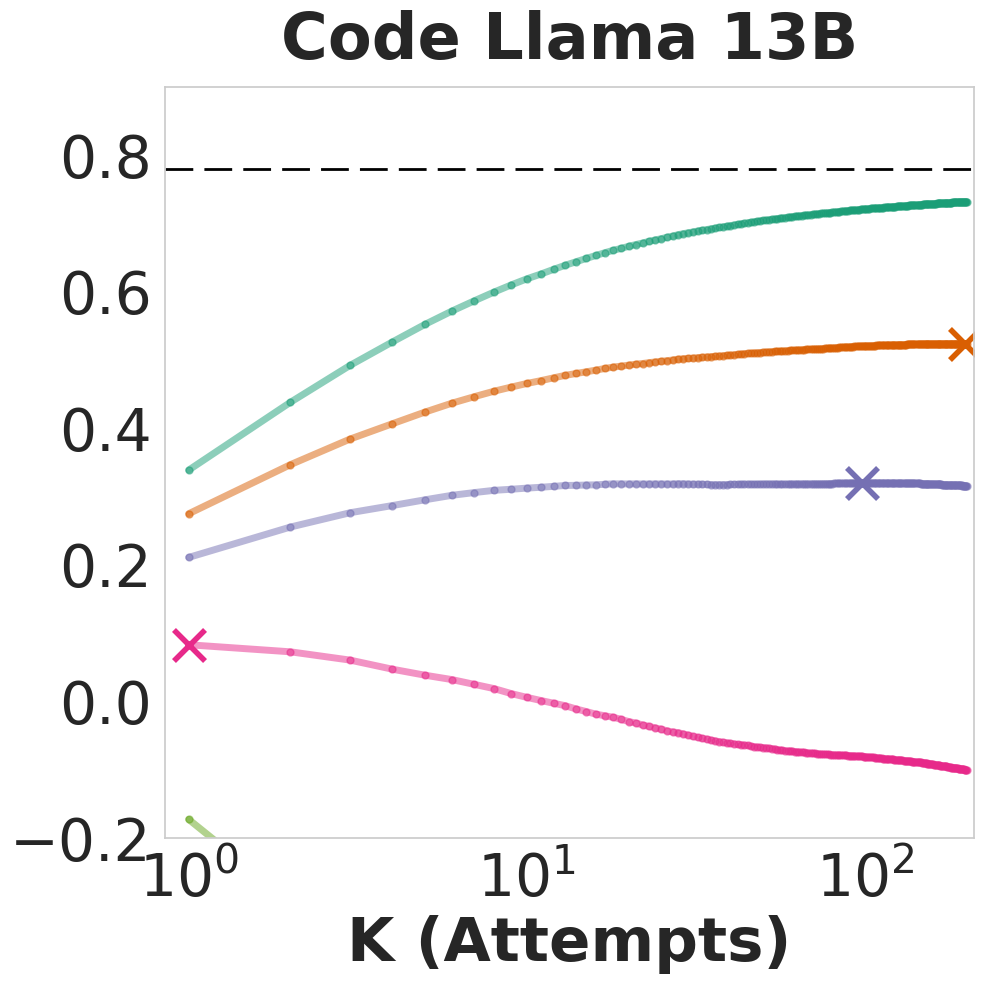

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Define different pass_base rewards to try
pass_base_rewards = [0, -1, -2, -4, -8]  # You can modify these values
K_MAX = 200

MODEL = "code-llama-13b_temp_0.8"
sim_results = run_optimized_simulation(data[MODEL], MODEL, n_simulations=1000, max_samples=200)

# Initialize an empty DataFrame
all_tasks_df = pd.DataFrame()

# Loop through each task_id and its data
for task_id, entries in sim_results[MODEL].items():
    task_df = pd.DataFrame(entries)
    task_df['task_id'] = task_id  # Add task_id as a column
    all_tasks_df = pd.concat([all_tasks_df, task_df], ignore_index=True)

plt.figure(figsize=(10, 10))
sns.set(style="whitegrid", palette="Dark2")

# Create a different color for each pass_base reward
colors = sns.color_palette("Dark2", n_colors=len(pass_base_rewards))
optimal_k_values = []

for pass_base, color in zip(pass_base_rewards, colors):
    # Create reward map for this pass_base value
    reward_map = {
        'pass_plus': 1,
        'pass_base': pass_base,
        'no_solution': 0
    }
    
    # Map the status to rewards
    all_tasks_df['reward'] = all_tasks_df['status'].map(reward_map)
    
    # Create reward_k columns
    for k in range(1, K_MAX + 1):
        all_tasks_df[f'reward_{k}'] = np.where(all_tasks_df['K'] <= k, all_tasks_df['reward'], 0)
    
    # Calculate average reward for each task at each K level
    task_reward_summary = all_tasks_df.groupby('task_id').agg(
        **{f'avg_reward_{k}': (f'reward_{k}', 'mean') for k in range(1, K_MAX + 1)}
    ).reset_index()
    
    # Compute mean rewards for each K value across tasks
    reward_summary_df = pd.DataFrame({
        'K': range(1, K_MAX + 1),
        'mean_reward': [task_reward_summary[f'avg_reward_{k}'].mean() for k in range(1, K_MAX + 1)]
    })
    
    # Plot this line
    plt.plot(reward_summary_df['K'], reward_summary_df['mean_reward'], 
             marker='o', markersize=5, color=color, 
             label=f'Ratio = {abs(pass_base)}', linewidth=5, alpha=0.5)
    
    # Find and mark optimal K for this pass_base
    max_reward = reward_summary_df['mean_reward'].max()
    max_reward_k = reward_summary_df['K'][reward_summary_df['mean_reward'].idxmax()]
    if max_reward < 0:
        max_reward_k = 0
        
    if max_reward_k != K_MAX:    
        # Store optimal K for labeling
        optimal_k_values.append((max_reward_k, color, pass_base))

        # add X marker
        plt.scatter(max_reward_k, max_reward, color=color, s=500, marker='x', linewidth=4)
    
    print(f'For pass_base={pass_base}: Maximum reward of {max_reward:.3f} achieved at K = {max_reward_k}')
    
    
plt.axhline(y=0.7791487886071686, color='black', linestyle='--', dashes=(10,4), linewidth=2, label='Conditional\n Pass@1')
plt.grid(False)
plt.xlabel('K (Attempts)', fontsize=44, fontweight='bold')
plt.title('Code Llama 13B', fontsize=46, fontweight='bold', pad=20)

# set xaxis to log
plt.xscale('log')
plt.xlim(.85, K_MAX+10)
plt.ylim(-0.2,0.9)

plt.xticks(fontsize=42)
plt.yticks(fontsize=42)

plt.tight_layout()
plt.show()

## Code Llama 7B

For pass_base=0: Maximum reward of 0.710 achieved at K = 200
For pass_base=-1: Maximum reward of 0.493 achieved at K = 200
For pass_base=-2: Maximum reward of 0.296 achieved at K = 36
For pass_base=-4: Maximum reward of 0.068 achieved at K = 2


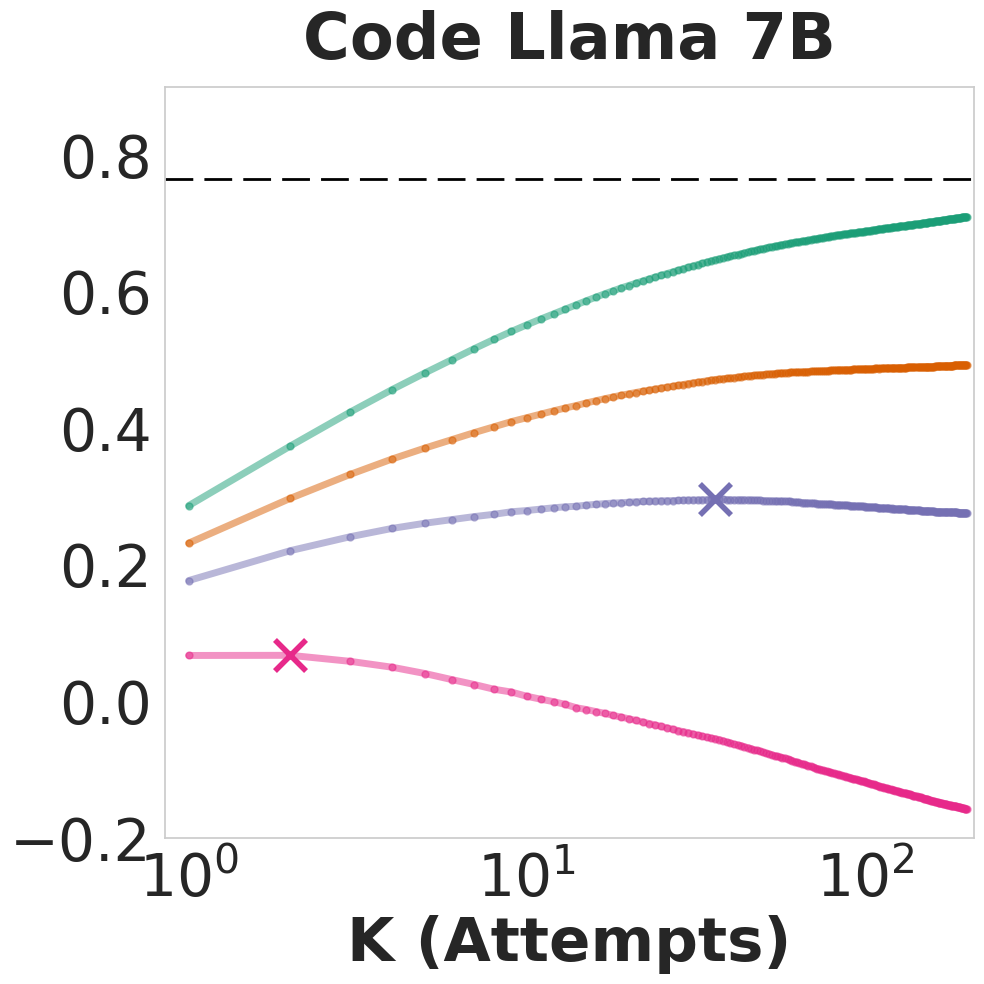

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Define different pass_base rewards to try
pass_base_rewards = [0, -1, -2, -4]  # You can modify these values
K_MAX = 200

MODEL = "code-llama-7b_temp_0.8"
sim_results = run_optimized_simulation(data[MODEL], MODEL, n_simulations=1000, max_samples=200)

# Initialize an empty DataFrame
all_tasks_df = pd.DataFrame()

# Loop through each task_id and its data
for task_id, entries in sim_results[MODEL].items():
    task_df = pd.DataFrame(entries)
    task_df['task_id'] = task_id  # Add task_id as a column
    all_tasks_df = pd.concat([all_tasks_df, task_df], ignore_index=True)

plt.figure(figsize=(10, 10))
sns.set(style="whitegrid", palette="Dark2")

# Create a different color for each pass_base reward
colors = sns.color_palette("Dark2", n_colors=len(pass_base_rewards))
optimal_k_values = []

for pass_base, color in zip(pass_base_rewards, colors):
    # Create reward map for this pass_base value
    reward_map = {
        'pass_plus': 1,
        'pass_base': pass_base,
        'no_solution': 0
    }
    
    # Map the status to rewards
    all_tasks_df['reward'] = all_tasks_df['status'].map(reward_map)
    
    # Create reward_k columns
    for k in range(1, K_MAX + 1):
        all_tasks_df[f'reward_{k}'] = np.where(all_tasks_df['K'] <= k, all_tasks_df['reward'], 0)
    
    # Calculate average reward for each task at each K level
    task_reward_summary = all_tasks_df.groupby(['task_id']).agg(
        **{f'avg_reward_{k}': (f'reward_{k}', 'mean') for k in range(1, K_MAX + 1)}
    ).reset_index()
    
    # Compute mean rewards for each K value across tasks
    reward_summary_df = pd.DataFrame({
        'K': range(1, K_MAX + 1),
        'mean_reward': [task_reward_summary[f'avg_reward_{k}'].mean() for k in range(1, K_MAX + 1)]
    })
    
    # Plot this line
    plt.plot(reward_summary_df['K'], reward_summary_df['mean_reward'], 
             marker='o', markersize=5, color=color, 
             label=f'Penalty-Ratio = {pass_base}', linewidth=5, alpha=0.5)
    
    # Find and mark optimal K for this pass_base
    max_reward = reward_summary_df['mean_reward'].max()
    max_reward_k = reward_summary_df['K'][reward_summary_df['mean_reward'].idxmax()]
    if max_reward < 0:
        max_reward_k = 0
        
    if max_reward_k != K_MAX:    
        # Store optimal K for labeling
        optimal_k_values.append((max_reward_k, color, pass_base))
        # add X marker
        plt.scatter(max_reward_k, max_reward, color=color, s=500, marker='x', linewidth=4)

    
    
    print(f'For pass_base={pass_base}: Maximum reward of {max_reward:.3f} achieved at K = {max_reward_k}')
    
    
plt.axhline(y=0.7645359573675352, color='black', linestyle='--', dashes=(10,4), linewidth=2, label='Conditional\n Pass@1')
plt.grid(False)
plt.xlabel('K (Attempts)', fontsize=44, fontweight='bold')
plt.title('Code Llama 7B', fontsize=46, fontweight='bold', pad=20)

# set xaxis to log
plt.xscale('log')
plt.xlim(.85, K_MAX+10)
plt.ylim(-0.2,0.9)

plt.xticks(fontsize=42)
plt.yticks(fontsize=42)

plt.tight_layout()
plt.show()

## GPT-4o

For pass_base=0: Maximum reward of 0.910 achieved at K = 200
For pass_base=-1: Maximum reward of 0.840 achieved at K = 200
For pass_base=-2: Maximum reward of 0.770 achieved at K = 200
For pass_base=-4: Maximum reward of 0.630 achieved at K = 200
For pass_base=-8: Maximum reward of 0.356 achieved at K = 1


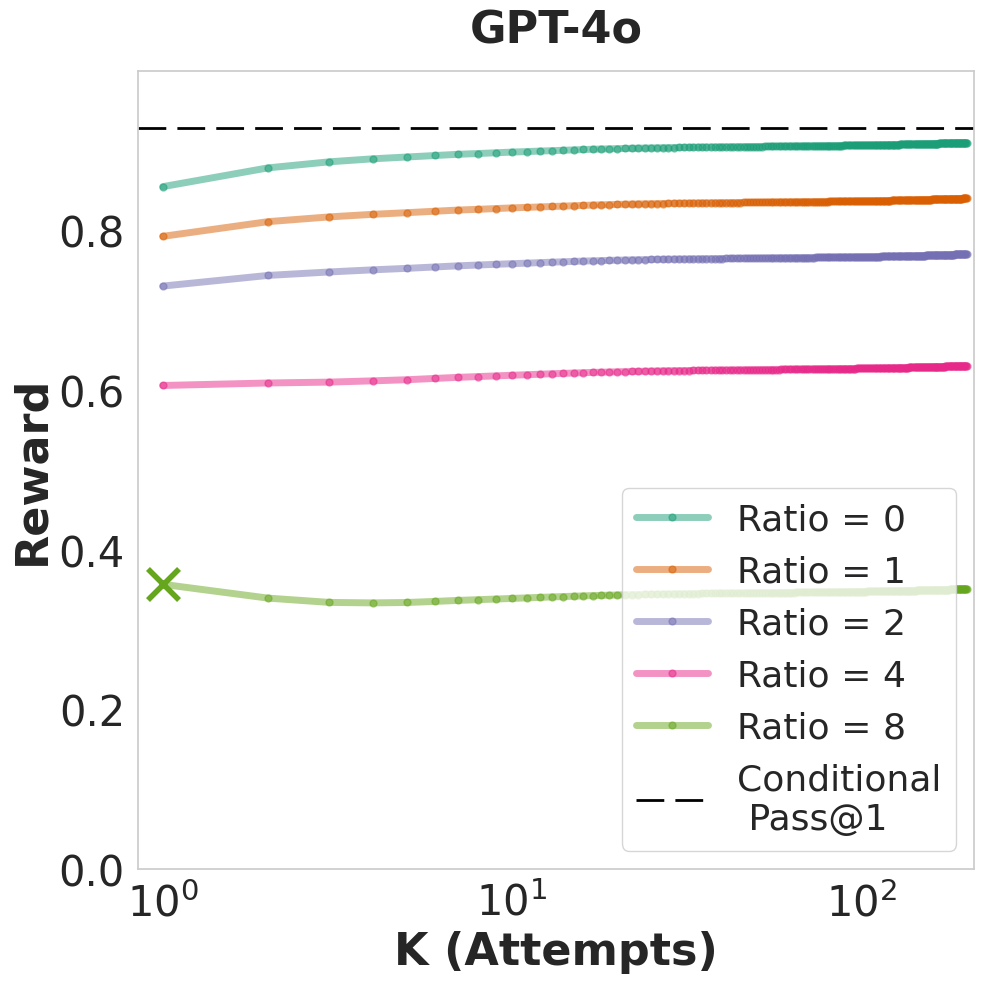

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

MODEL = "gpt-4o_azure_temp_0.8-sanitized"
sim_results = run_optimized_simulation(data[MODEL], MODEL, n_simulations=1000, max_samples=200)


# Initialize an empty DataFrame
all_tasks_df = pd.DataFrame()

# Loop through each task_id and its data
for task_id, entries in sim_results[MODEL].items():
    task_df = pd.DataFrame(entries)
    task_df['task_id'] = task_id  # Add task_id as a column
    all_tasks_df = pd.concat([all_tasks_df, task_df], ignore_index=True)

# Define different pass_base rewards to try
pass_base_rewards = [0, -1, -2, -4, -8]  # You can modify these values
K_MAX = 200

plt.figure(figsize=(10, 10))
sns.set(style="whitegrid", palette="Dark2")

# Create a different color for each pass_base reward
colors = sns.color_palette("Dark2", n_colors=len(pass_base_rewards))
optimal_k_values = []

for pass_base, color in zip(pass_base_rewards, colors):
    # Create reward map for this pass_base value
    reward_map = {
        'pass_plus': 1,
        'pass_base': pass_base,
        'no_solution': 0
    }
        
    # Map the status to rewards
    all_tasks_df['reward'] = all_tasks_df['status'].map(reward_map)
    
    # Create reward_k columns
    for k in range(1, K_MAX + 1):
        all_tasks_df[f'reward_{k}'] = np.where(all_tasks_df['K'] <= k, all_tasks_df['reward'], 0)
    
    # Calculate average reward for each task at each K level
    task_reward_summary = all_tasks_df.groupby('task_id').agg(
        **{f'avg_reward_{k}': (f'reward_{k}', 'mean') for k in range(1, K_MAX + 1)}
    ).reset_index()
    
    # Compute mean rewards for each K value across tasks
    reward_summary_df = pd.DataFrame({
        'K': range(1, K_MAX + 1),
        'mean_reward': [task_reward_summary[f'avg_reward_{k}'].mean() for k in range(1, K_MAX + 1)]
    })
    
    # Plot this line
    plt.plot(reward_summary_df['K'], reward_summary_df['mean_reward'], 
             marker='o', markersize=5, color=color, 
             label=f'Ratio = {abs(pass_base)}', linewidth=5, alpha=0.5)
    
    # Find and mark optimal K for this pass_base
    max_reward = reward_summary_df['mean_reward'].max()
    max_reward_k = reward_summary_df['K'][reward_summary_df['mean_reward'].idxmax()]
    if max_reward < 0:
        max_reward_k = 0
        
    if max_reward_k != K_MAX and pass_base != 0:    
        # Add vertical line at optimal K
        # plt.axvline(x=max_reward_k, color=color, linestyle='--', alpha=0.5, linewidth=3, dashes=(10, 4))
        # Store optimal K for labeling
        optimal_k_values.append((max_reward_k, color, pass_base))
        
        # add X marker
        plt.scatter(max_reward_k, max_reward, color=color, s=500, marker='x', linewidth=4)

    
    print(f'For pass_base={pass_base}: Maximum reward of {max_reward:.3f} achieved at K = {max_reward_k}')
    
    
plt.axhline(y=0.9288279561535917, color='black', linestyle='--', dashes=(10,4), linewidth=2, label='Conditional\n Pass@1')
plt.grid(False)
plt.xlabel('K (Attempts)', fontsize=32, fontweight='bold')
plt.ylabel('Reward', fontsize=32, fontweight='bold')
plt.title('GPT-4o', fontsize=32, fontweight='bold', pad=20)

# set xaxis to log
plt.xscale('log')
plt.xlim(.85, K_MAX+10)
plt.ylim(-0,1)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8])

# plt.xticks(fontsize=42)
# plt.yticks(fontsize=42)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# plt.xticks(range(1, K_MAX+1, 2))  # Show every other K value to avoid crowding
plt.legend(loc='lower right', fontsize=26)
plt.tight_layout()
plt.show()